# Importations

In [103]:
import sys
MOD_DIR = '/home/16012858/game-learning'

if MOD_DIR not in sys.path:
    sys.path.append(MOD_DIR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

from sklearn import datasets
from sklearn import svm, naive_bayes
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from mod.wine_regression import *

## Directory

In [104]:
#INPUT_DIR = "./data/high_diamond_ranked_10min.csv"

In [105]:
INPUT_DIR = f"{MOD_DIR}/data/high_diamond_ranked_10min.csv"

# Importation des données et pre-processing

Il s'agit du plus grand jeu en ligne de tous les temps et nous nous posons la question suivante: est-il possible de prédire l'issue d'un match en se basant sur les statistiques des 10 premières minutes ?

League of Legends est un jeu de stratégie en équipe où deux équipes de cinq puissants champions s'affrontent pour détruire la base de l'autre. 

Les bases du jeu sont les suivantes:

- Les joueurs accumulent de l'or et de l'expérience en tuant des serviteurs, des monstres, d'autres joueurs et des tours.
- Les gardes permettent de voir sur la carte les personnes qui viennent nous tuer.
- L'objectif principal du jeu est de détruire un certain nombre de tours afin de détruire la base de l'adversaire.

Nous vous résumons tout ceci en image:

![Mon image](img_lol.PNG)

In [106]:
data = pd.read_csv(INPUT_DIR)
data.head(20)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [108]:
y = data["blueWins"]

drop_cols = ['gameId','blueWins']
X = data.drop(drop_cols, axis=1)

X.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


### Répartition des issues de parties

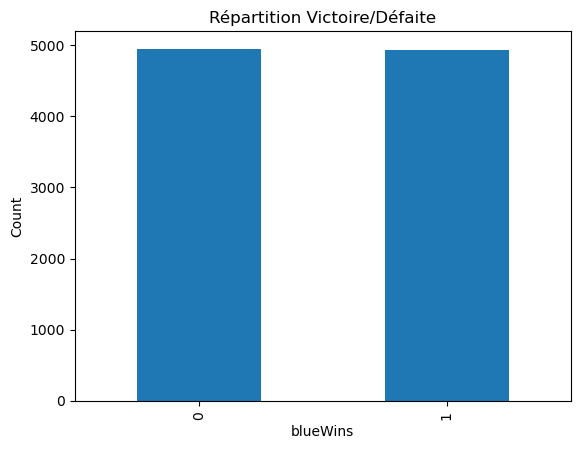

Red Wins: 4949 (50.096%), Blue Wins: 4930(49.904%)


In [109]:
counts = y.value_counts()
counts.plot(kind='bar')

plt.xlabel('blueWins')
plt.ylabel('Count')
plt.title('Répartition Victoire/Défaite')
plt.show()

W, L = y.value_counts()

print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(W,round(100*W/(W+L),3),L,round(100*L/(W+L),3)))

Notre ensemble de données fournit presque 50/50 de données pour notre variable cible, ce qui signifie qu'il n'y a pas de déséquilibre.

In [110]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


Nous allons enlever les variables inutiles associées à l'équipe rouge, qui sont le reflet des performances de l'équipe bleu. En effet, le nombre de morts dans l'équipe bleu correspond au nombre de "kills" dans l'équipe rouge etc...

In [111]:
X.drop(['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin'], axis=1, inplace=True)
X.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,...,8,0,0,0,0,16567,6.8,17047,197,55
1,12,1,0,5,5,5,0,0,0,0,...,2,2,1,1,1,17620,6.8,17438,240,52
2,15,0,0,7,11,4,1,1,0,0,...,14,0,0,0,0,17285,6.8,17254,203,28
3,43,1,0,4,5,5,1,0,1,0,...,10,0,0,0,0,16478,7.0,17961,235,47
4,75,4,0,6,6,6,0,0,0,0,...,7,1,1,0,0,17404,7.0,18313,225,67


In [112]:
X.shape

(9879, 29)

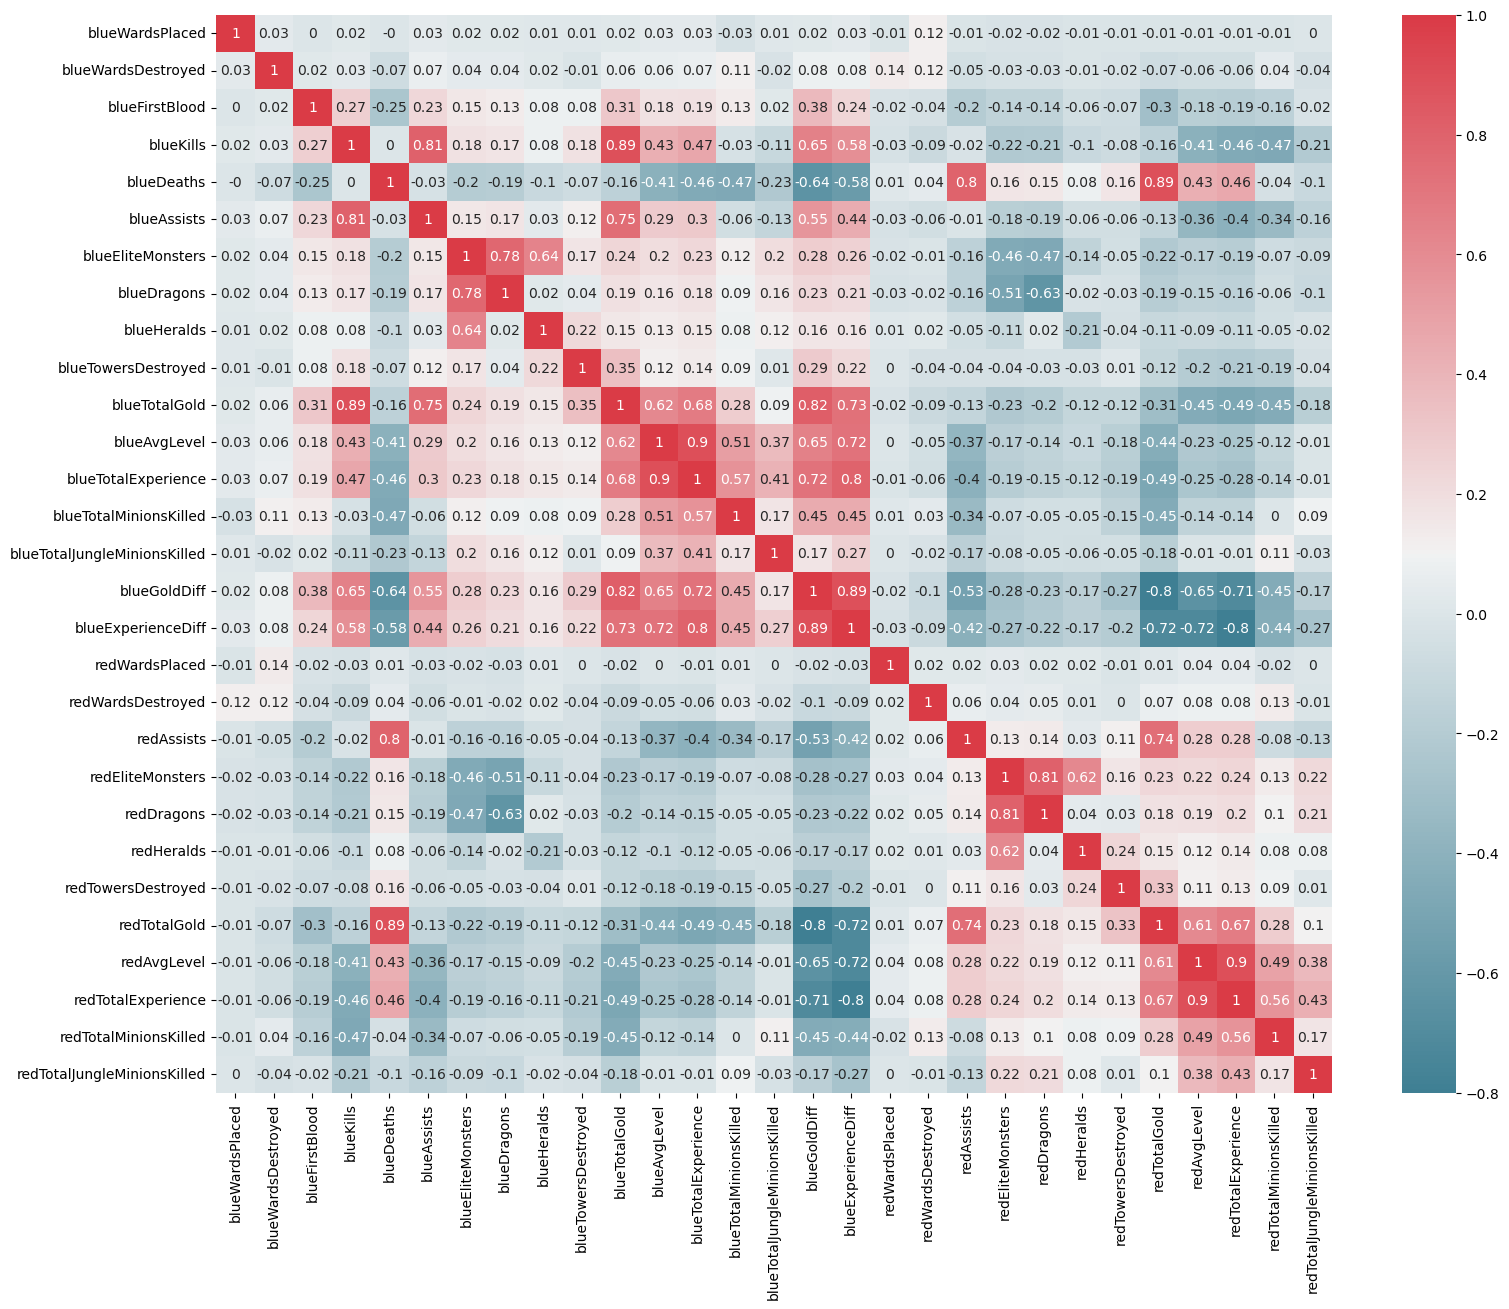

In [113]:
plt.figure(figsize=(18,14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(round(X.corr(),2), cmap=cmap, annot=True)
plt.show()

On remarque que les données "redAvgLevel" et "blueAvgLevel" sont des informations assez redondantes par rapport aux variables "redTotalExperience" et "blueTotalExperience". On peut les exclure:

In [114]:
X.drop(["redAvgLevel","blueAvgLevel"], axis=1, inplace=True)